# CS 229: Problem Set 1

## Question 1

<hr>

In lecture, we demonstrated that ridge regression could be justified as the maximum a postiori (MAP) estimation of $w$, provided we made certain assumptions about the distribution of the true weight vector, $p(w)$, and the distribution of the label noise, $p(y\mid x)$.

In this problem, demonstrate what assumptions should be made to justify **lasso** regression as a MAP estimation problem.

State clearly the distributional assumptions and derive clearly how MAP estimation under these assumption is the same as minimizing the lasso regression total loss function.


<hr>

We make the assumtion that $y_i = w^T x_i + \epsilon_i$ s.t. $\mathbf{E}[\epsilon|X_i] = 0 $ and $ \mathbf{Var}(\epsilon|X_i ) = \sigma^2$. We assume that the coefficients have Laplace prior distributions. note $b$ is the diversity, a scale parameter. $b = \pm \sqrt{\dfrac{\sigma^2}{2}}$

$$\sum_{i}^{} (y_i - w^T x_i)^2 + \lambda\sum_{j}^{} |w_j|$$

$$ w_{losso} = arg \min_w \sum_{i}^{} (y_i - w^T x_i)^2  \qquad s.t. \;  ||w_{lasson}|| \; \le s $$

$$p(w) = \frac{1}{2b}e^{\frac{-1}{b}||w||_1}  \qquad s.t. \; b > 0, \qquad p(y|x,w) = \frac{1}{(\sqrt{2\pi})^2\sigma}e^{\frac{-1}{2\sigma^2}(y-w^Tx)^2}$$

$$ p(w|Y,X) = \dfrac{p(Y,X,w)} {p(Y,X)} = \dfrac{p(Y∣X,w)p(X)p(w)}{p(X,Y)}$$

$$ln \; p(w|Y,X) = ln \; p(Y,X,w) -ln \; p(Y,X) $$

$$ = ln \; p(w) + ln \; p(X) + ln \; p(Y|w,X) +k_1 $$

$$ = \dfrac{-1}{b}||w||_1 + ln \; p(Y|w,X) +k_2$$

$$ = \dfrac{-1}{b}||w||_1+ \sum_{i}^{} \frac{-1}{2\sigma^2} (y_i - w^T x_i)^2 + k_3$$

$$ = 2\sigma^2(\dfrac{-1}{b}||w||_1  - \frac{1}{2\sigma^2} \sum_{i}^{} (y_i - w^T x_i)^2 + k_3)$$

$$ \Rightarrow - \sum_{i}^{} (y_i - w^T x_i)^2 - \underbrace{\frac{2\sigma^2}{b}}_{\lambda}||w||_1 $$

## Question 2

<hr>

In this question, you will reproduce the bias-variance plots from the slide set 04 on slide #14.  But, for a different target function.

Let the true function be $f(x) = \tan(\frac{\pi x}{3}) + (x - 0.5)^2$.
Draw your $x$ points uniformly at random from the interval $(-1,+1)$.
Let the target $y$ values be $f(x) + \text{noise}$ where the noise is drawn from a normal (Gaussian) distribution with mean $0$ and *standard deviation* 0.5.

$x$ is one-dimensional in this toy example.  However, you should fit a *fifth*-degree polynomial, making the effective number of features $6$.

You are to make three graphs, one for each of the three different values of $\lambda$ in ridge regression: 0.001, 0.1, 10.  For each graph, plot 100 samples of the resulting learned function in red.  Plot the average function (across *1000* samples) in black.  Plot the true function in green.

Set the axes to be consistent across the graphs:  $x$ ranging from $-1$ to $+1$, and $y$ ranging from $-0.5$ to $+4.5$.


<hr>

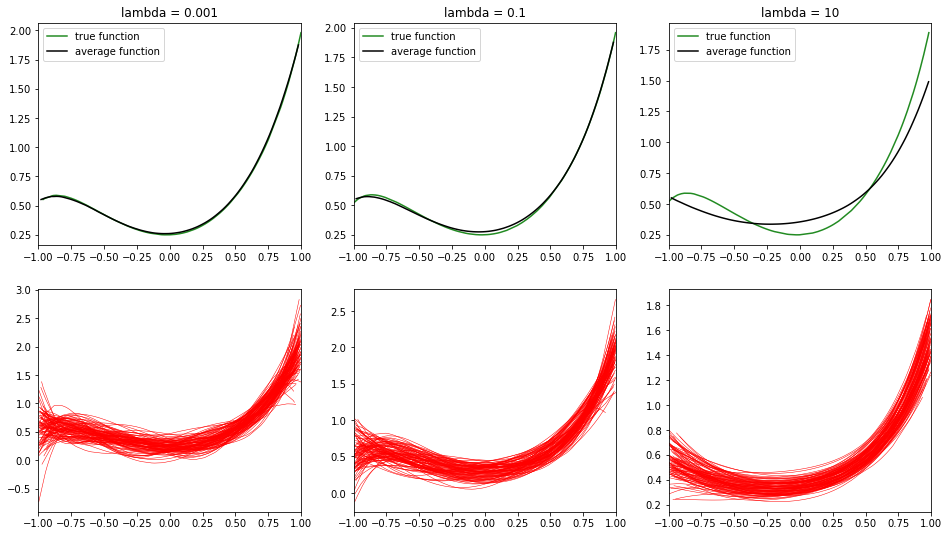

<Figure size 1440x1280 with 0 Axes>

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
#size of output chart
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

def f(x):
    return np.tan((np.pi * x)/3) + (x - 0.5)**2

def f_hat(x,w):
    # fit a fifth-degree polynomial, making the effective number of features  6 .
    return w[0] + w[1]*(x) + w[2]*(x**2) + w[3]*(x**3) + w[4]*(x**4) + w[5]*(x**5)

def ridge_regression(lamda, X, Y):
    # W = (X.T*X + lamda I)^-1 X.T * Y
    return np.matmul(inv((np.matmul(np.transpose(X),X))  + lamda * np.identity(X.shape[1])),np.matmul(np.transpose(X),Y))
    
def regression(X, Y):
    #W = (X.T*X)^-1(X.T*Y)
    return np.matmul(inv((np.matmul(np.transpose(X),X))),np.matmul(np.transpose(X),Y))
    
def model(points, samples, lamda, index):
    yavg = np.zeros((points))
    functions = [None] *samples
    xs = [None] *samples
    xavg = np.zeros((points))
    for i in range(samples):
        
        X0 = np.ones(points)
        X1 = np.sort(np.random.uniform(-1,+1,points))
        X =  np.column_stack((X0 , X1, X1**2, X1**3, X1**4, X1**5)) # Draw your  𝑥  points uniformly at random from the interval  (−1,+1) 
        x =  X1
        xs[i] = x
        xavg += x
        mu, sigma = 0, 0.5 # mean and standard deviation
        noise = np.random.normal(mu, sigma, points)

        f_x = f(x)
        
        Y = f_x  + noise
        #print(Y)
        w = ridge_regression(lamda,X,Y)
        #print(Y)
        
        # w = regression(X,Y)

        #polynomial fitting the data 
        b = f_hat(x,w)
        
        yavg += b
        
        functions[i] = b
      
        
    yavg = yavg / samples
    xavg = xavg / samples
    #print(avg)
    plt.subplot(2,3,index)
    plt.title('lambda = ' + str(lamda))
    plt.xlim(-1,1)
    #plt.ylim(-.5,4.5)
    plt.plot(x,f_x,'forestgreen')
    plt.plot(xavg,yavg,'black')
    plt.legend(("true function", "average function"),loc='upper left')
    
    plt.subplot(2,3,index + 3)
    plt.xlim(-1,1)
    #plt.ylim(-.5,4.5)
    for i in range(samples//10):
        plt.plot(xs[i],functions[i],'r-',linewidth=.5)
    
 

model(points = 100,samples = 1000,lamda =.001,index = 1)
model(points = 100,samples = 1000,lamda = .1, index= 2)
model(points = 100,samples = 1000,lamda = 10, index = 3)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()


    

# Note
When the $\lambda = .001$ we have low bias as the avarege function is on the curve. However we have high variance as demostrated by the spread on any particular function. 

When the $\lambda = .1$ we have low bias as the avarege function is almost on the curve. However we still have high variance but not as much as  $\lambda = .001$. 

When the $\lambda = .1$ we have high bias as the avarege function is not on the curve. However we have lower variance since any particular funtion in pretty simalar. 

## Question 3

<hr>

The supplied file, `comm.txt`, contains the data for the "Communities and Crime" data set from the UCI Machine Learning Repository.  This problem has 1994 examples, each with 100 attributes.  This is small by modern machine learning standards, but will provide a simple example for this question.  Each attribute represents some quantity about a US community in the 1990s.  The last attribute represents the rate of violent crimes in the same community (per captia).  All of the attributes have been "normalized."  That is, they have been scaled to fit on the same range.  In some cases this is a good idea; in others it is not.  It has already been performed here, so we do not have a choice.

The goal is the predict the violent crime rate from the other attributes.  We would like to know how well our method would work on "future unseen" communities.  However, we don't know what those future communities would be.  So, instead we will reserve part of the data as *testing data*.  The dataset has already been placed in random order.  Use the first 1000 communities as the *training data*.  Use the last 994 as the *testing data*.

<hr>

### part a

Run lasso regression (using `sklearn.linear_model.Lasso` -- see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html -- do not write your own lasso regression learning code) on the training set for a variety of $\lambda$ values from $10^{-6}$ to $10^{-1}$.  For each $\lambda$, compute the average squared error on the training data and on the testing data.  Plot this relationship (average error versus $\lambda$) for both training and testing data on the same graph.  Label your graph.  Use a semi-log plot (see matplotlib's `semilogx` function). The $\lambda$ axis should be on a log scale but the vertical error axis on a linear scale.

(Do not worry if you get warnings about it not converging for the small values of $\lambda$.  You can fix this by setting `max_iter=10000` in your construction of the `Lasso` object, but it will take longer to run and it isn't necessary to get good results.)
<hr>

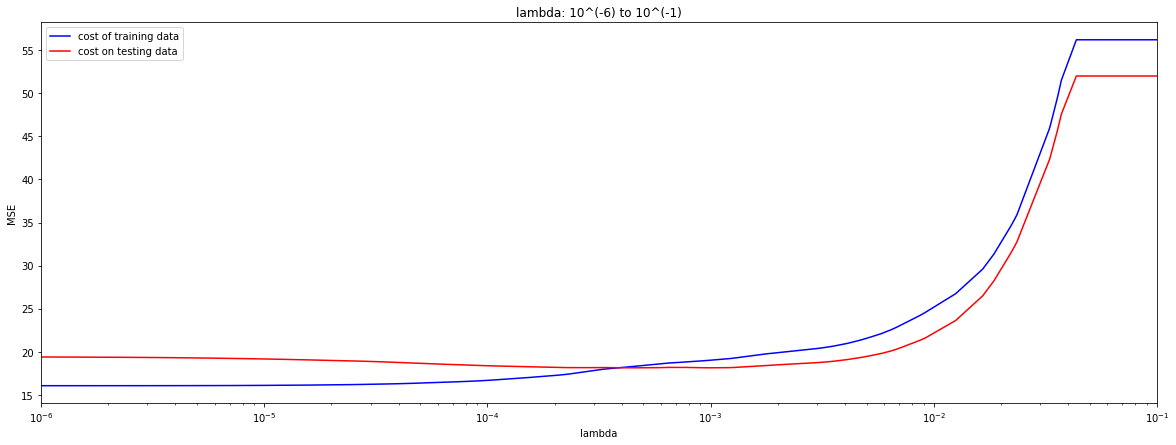

<Figure size 1440x1280 with 0 Axes>

In [52]:
# some code to start you off...
import numpy as np # for numpy
import matplotlib.pyplot as plt # for plotting

from sklearn import linear_model as lm # for linear_model.Lasso
#size of output chart
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 7) # (w, h)


def solvelasso(trainX,trainY,lmbda):
    m = lm.Lasso(alpha=lmbda,fit_intercept=True,max_iter=10000)
    m.fit(trainX,trainY)
    weights = m.coef_
    
    return m.intercept_ , weights
    
def MSE(y,x, w, b):
    cost = 0 
    cost  = np.sum((y - (np.dot(x,w) +b))**2 )
    return cost; 

D = np.loadtxt('comm.txt') # load data
X = D[:,0:99] # split first 99 columns into X
Y = D[:,-1] # and last column into Y


trainX = X[0:1000,:] # split first 1000 (indexed 0 through 999) into training
trainY = Y[0:1000]
testX = X[1000:,:] # and last 999 (indexed 1000 to the end) into testing
testY = Y[1000:]


# Your solution here
#sample lamdas uniformly 
samples = 100
lmbdas = np.array((.000001,.1))
l1 = np.random.uniform(.000001,.00001, samples//5)
lmbdas = np.append(lmbdas ,l1)
l2 = np.random.uniform(.00001,.0001, samples//5)
lmbdas = np.append(lmbdas ,l2)
l3 = np.random.uniform(.0001,.001, samples//5)
lmbdas = np.append(lmbdas ,l3)
l4 = np.random.uniform(.001,.01, samples//5)
lmbdas = np.append(lmbdas ,l4)
l5 = np.random.uniform(.01,.1, samples//5)
lmbdas = np.append(lmbdas ,l5)
lmbdas = np.sort(lmbdas)
samples +=2

cost_train = [None]*samples
cost_test = [None]*samples
ws = np.zeros(shape=(samples,100))
for i in range (samples): 
    intercept, w= solvelasso(trainX,trainY,lmbdas[i])
    cost_train[i] = MSE(trainY,trainX,w,intercept)
    cost_test[i] = MSE(testY,testX,w,intercept)
    w = np.append(intercept,w)
    ws[i] = w


plt.semilogx(lmbdas,cost_train ,'b-')
plt.semilogx(lmbdas,cost_test ,'r-')

plt.title('lambda: 10^(-6) to 10^(-1)' )
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.xlim(.000001,.1)
plt.legend(("cost of training data","cost on testing data" ),loc='upper left')
    
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()


# Note 
The MSE for the testing and training change in a significant way with $\lambda$. Although they follow the same curve the difference between them is interesting. We can tell that the model generalizes better to unseen data if $\lambda$ is large since the testing data perform better however there is high bias. When $\lambda$ is small the model performs better but it does not generalize as well. The optimal $lambda$ happens between $10^{-4}$ and $10^{-3}$. 


### part b

In a separate graph (below), plot the relationship between $\lambda$ and the weights.  In particular, for each weight, plot it versus $\lambda$ (again on a semi-log plot).  In total, you should have 100 different lines.  Make the line for the intercept black and all of the others various colors.  Label your axes, but there is no need to label each line.

<hr>

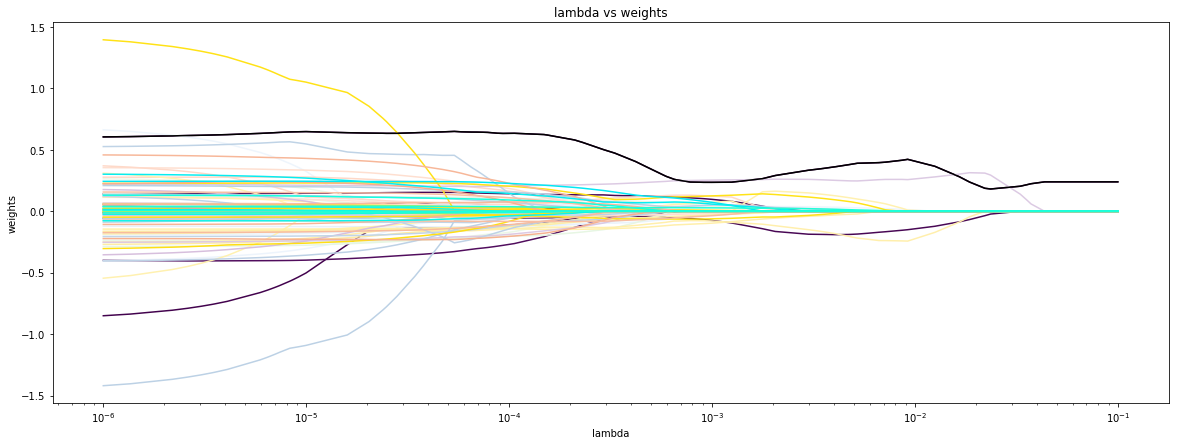

<Figure size 1440x1280 with 0 Axes>

In [54]:
# Your code here
#size of output chart
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 7) # (w, h)


colors =  np.random.rand(100,3)
   
palette = plt.get_cmap('PRGn')    
for j in range(100):  
    if(j==10):
        palette = plt.get_cmap('Blues')   
    if(j==20):
        palette = plt.get_cmap('Greens')  
    if(j==30):
        palette = plt.get_cmap('Reds') 
    if(j==40):
        palette = plt.get_cmap('YlOrBr')  
    if(j==50):
        palette = plt.get_cmap('PuRd')  
    if(j==60):
        palette = plt.get_cmap('BuPu') 
    if(j==70):
        palette = plt.get_cmap('Wistia')  
    if(j==80):
        palette = plt.get_cmap('RdGy') 
    if(j==90):
        palette = plt.get_cmap('jet')  
    plt.semilogx(lmbdas,ws[:,j],color=palette(j))
    
plt.semilogx(lmbdas,ws[:,0],'black')

plt.title('lambda vs weights' )
plt.xlabel('lambda')
plt.ylabel('weights')
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()


# Note
If we think about this in terms of $\lambda$ the penalizing large sum of weights then as $\lambda$ gets smaller then the size sum of the weights really does not get penalize and thus more weights are taken into consideration. This graph clearly suggests that if $\lambda$ is large then the sum of the weights has to be small and thus most of the weights are zero. But if $\lambda$ is small we allow all of the weights to contribute some amount. The optimal solution involves some linear combination of a few of the weights. 
